In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
data = fetch_california_housing(as_frame=True)
df=data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
x= df.drop('MedHouseVal', axis=1)
y=df['MedHouseVal']

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [5]:
print('Intercept', model.intercept_)
print('coefficients', model.coef_.round(2))

Intercept -36.94192020718441
coefficients [ 0.44  0.01 -0.11  0.65 -0.   -0.   -0.42 -0.43]


If MedInc increases by 1 unit, the MedHouseVal will increase by 0.44, holding other variables constant.

In [6]:
from sklearn.metrics import r2_score
pred = model.predict(x)

r2 = r2_score(y, pred)
print(r2)

0.606232685199805


R^2 = 60% of the MedHouseVal is explained by our model because of independent variables, and the remaining 40% is due to noise or other factors.

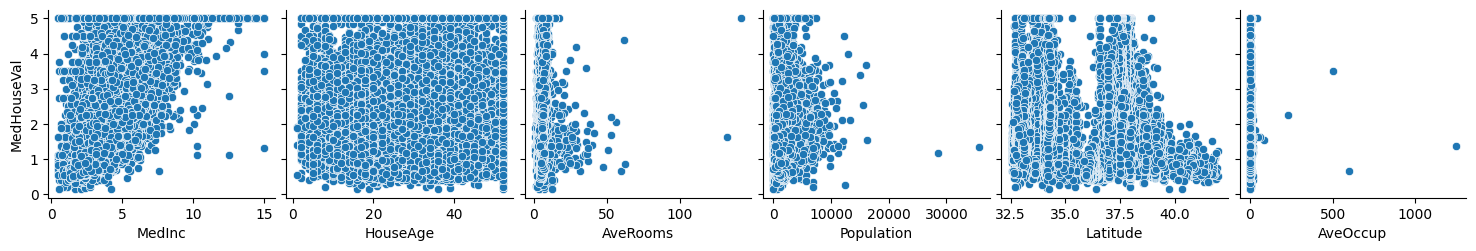

In [15]:
import seaborn as sns
sns.pairplot(df, x_vars=['MedInc', 'HouseAge', 'AveRooms', 'Population', 'Latitude', 'AveOccup'],y_vars=['MedHouseVal'])

The strongest linear relationship exists between median income and house value (r = 0.688), visible as a clear upward trend in your scatter plots. Other features like population and occupancy show near-zero correlation, appearing as random clouds with no linear slope. All plots reveal a data cap at 5.0, creating a horizontal line that slightly weakens the overall linear fit of the model.

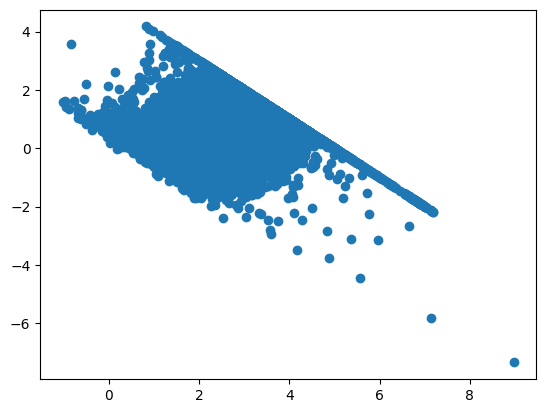

In [8]:
residuals = y-pred
plt.scatter(pred,residuals)

(array([   9.,   14.,   61.,  255.,  538.,  676.,  546.,  803.,  881.,
         706.,  812.,  715.,  836.,  815.,  921.,  960.,  786.,  817.,
         703.,  505.,  620.,  661.,  578.,  508.,  432.,  439.,  463.,
         331.,  320.,  216.,  224.,  232.,  245.,  252.,  286.,  193.,
         160.,  149.,  117.,  133.,  104.,   99.,   80.,   90.,  106.,
          66.,   49.,   51.,   47., 1030.]),
 array([0.14999  , 0.2469904, 0.3439908, 0.4409912, 0.5379916, 0.634992 ,
        0.7319924, 0.8289928, 0.9259932, 1.0229936, 1.119994 , 1.2169944,
        1.3139948, 1.4109952, 1.5079956, 1.604996 , 1.7019964, 1.7989968,
        1.8959972, 1.9929976, 2.089998 , 2.1869984, 2.2839988, 2.3809992,
        2.4779996, 2.575    , 2.6720004, 2.7690008, 2.8660012, 2.9630016,
        3.060002 , 3.1570024, 3.2540028, 3.3510032, 3.4480036, 3.545004 ,
        3.6420044, 3.7390048, 3.8360052, 3.9330056, 4.030006 , 4.1270064,
        4.2240068, 4.3210072, 4.4180076, 4.515008 , 4.6120084, 4.7090088,
        

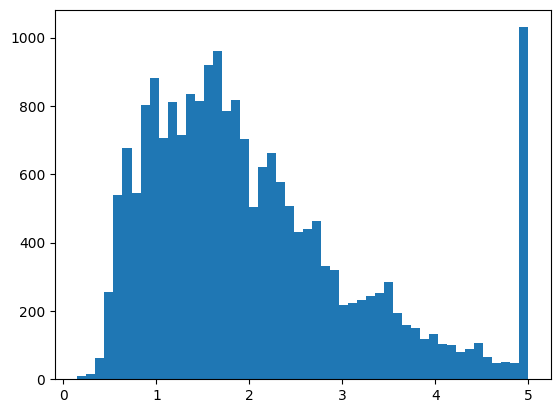

In [9]:
plt.hist(y,bins=50)

The model is likely suffering from heteroscedasticity, as there's a very sharp, straight diagonal boundary on the top right (the plot shows a clear downward-sloping "wedge"). caused by the target variable (y) being skewed and having large outliers. This means the p-values and confidence intervals might be unreliable, and the model isn't giving enough weight to the more "stable" data points.

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 1.000e+01, 3.200e+01,
        3.900e+01, 7.900e+01, 2.110e+02, 6.240e+02, 1.569e+03, 3.043e+03,
        3.596e+03, 3.291e+03, 2.472e+03, 1.702e+03, 1.200e+03, 8.590e+02,
        4.830e+02, 3.970e+02, 2.620e+02, 2.040e+02, 1.740e+02, 1.230e+02,
        1.000e+02, 6.700e+01, 3.700e+01, 1.800e+01, 1.600e+01, 1.000e+01,
        3.000e+00, 3.000e+00]),
 array([-7.34527576, -7.11487233, -6.88446889, -6.65406546, -6.42366202,
        -6.19325859, -5.96285516, -5.73245172, -5.50204829, -5.27164485,
        -5.04124142, -4.81083798, -4.58043455, -4.35003111, -4.11962768,
        -3.88922425, -3.65882081, -3.42841738, -3.19801394, -2.96761051,
        -2.73720707, -2.50680364, -2.27640021, -2.04599677, -1.81559334,
        -1.

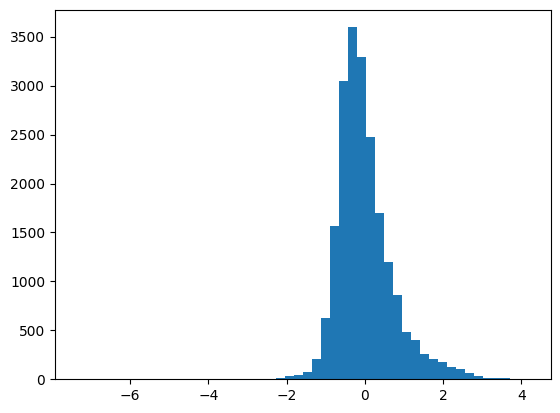

In [10]:
plt.hist(residuals, bins=50)

Residuals are mostly normal with little to none right skewed.

In [11]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


**Key Relationship, Correlation, Interpretation.**

MedInc vs. MedHouseVal (0.688): This is your strongest predictor. As median income increases, house value increases significantly.

AveRooms vs. AveBedrms (0.848): Extremely high correlation. This suggests multicollinearity. You likely don't need both features in the model.

Latitude vs. Longitude (-0.925): Strong negative correlation, which makes sense geographically for California (diagonal orientation).

HouseAge vs. Population (-0.296): Weak negative correlation; newer areas tend to have higher populations.

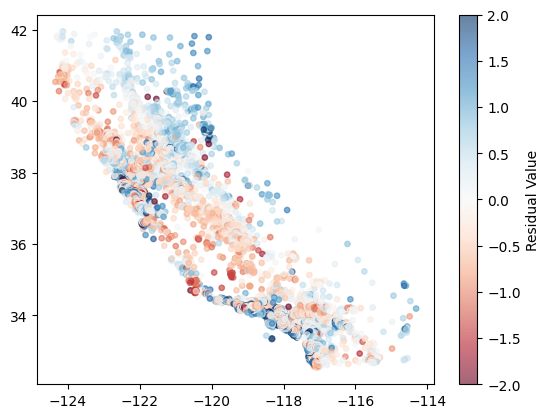

In [16]:
sc = plt.scatter(df['Longitude'], df['Latitude'], 
                 c=residuals, cmap='RdBu', 
                 alpha=0.6, s=15, vmin=-2, vmax=2)

plt.colorbar(sc, label='Residual Value')

The errors are not randomly distributed like "salt and pepper"; the model is experiencing spatial autocorrelation. This means the model's errors for one house are likely related to its neighbors, which is common in real estate data.

Hence, the assumptions fail.

Linearity fails → biased model

Independence fails → wrong inference

Heteroscedasticity → incorrect standard errors

Non-normality → weak inference in small samples

Multicollinearity → unstable coefficients
